# Importing Libraries, Modules and Dataset

In [242]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import LabelEncoder

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier, Random Forest, SVM, and KNN models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import Classification Report, Confusion Matrix,and Cross Validation Score function
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [243]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# SECTION 1: EDA(Exploratory Data Analysis)

In [244]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [246]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [247]:
#Use the value_counts() function to see how many of which quality class are in the data set. And store this information as "classes" pandas series
classes = data['quality'].value_counts()
classes

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# SECTION 2: DATA VISUALIZATION

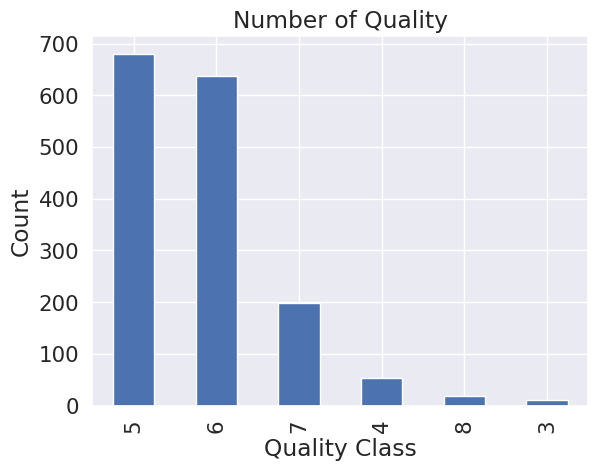

In [248]:
#Plot bar chart of classes
classes.plot(kind='bar')
plt.title('Number of Quality') 
plt.xlabel('Quality Class')
plt.ylabel('Count')


plt.show()

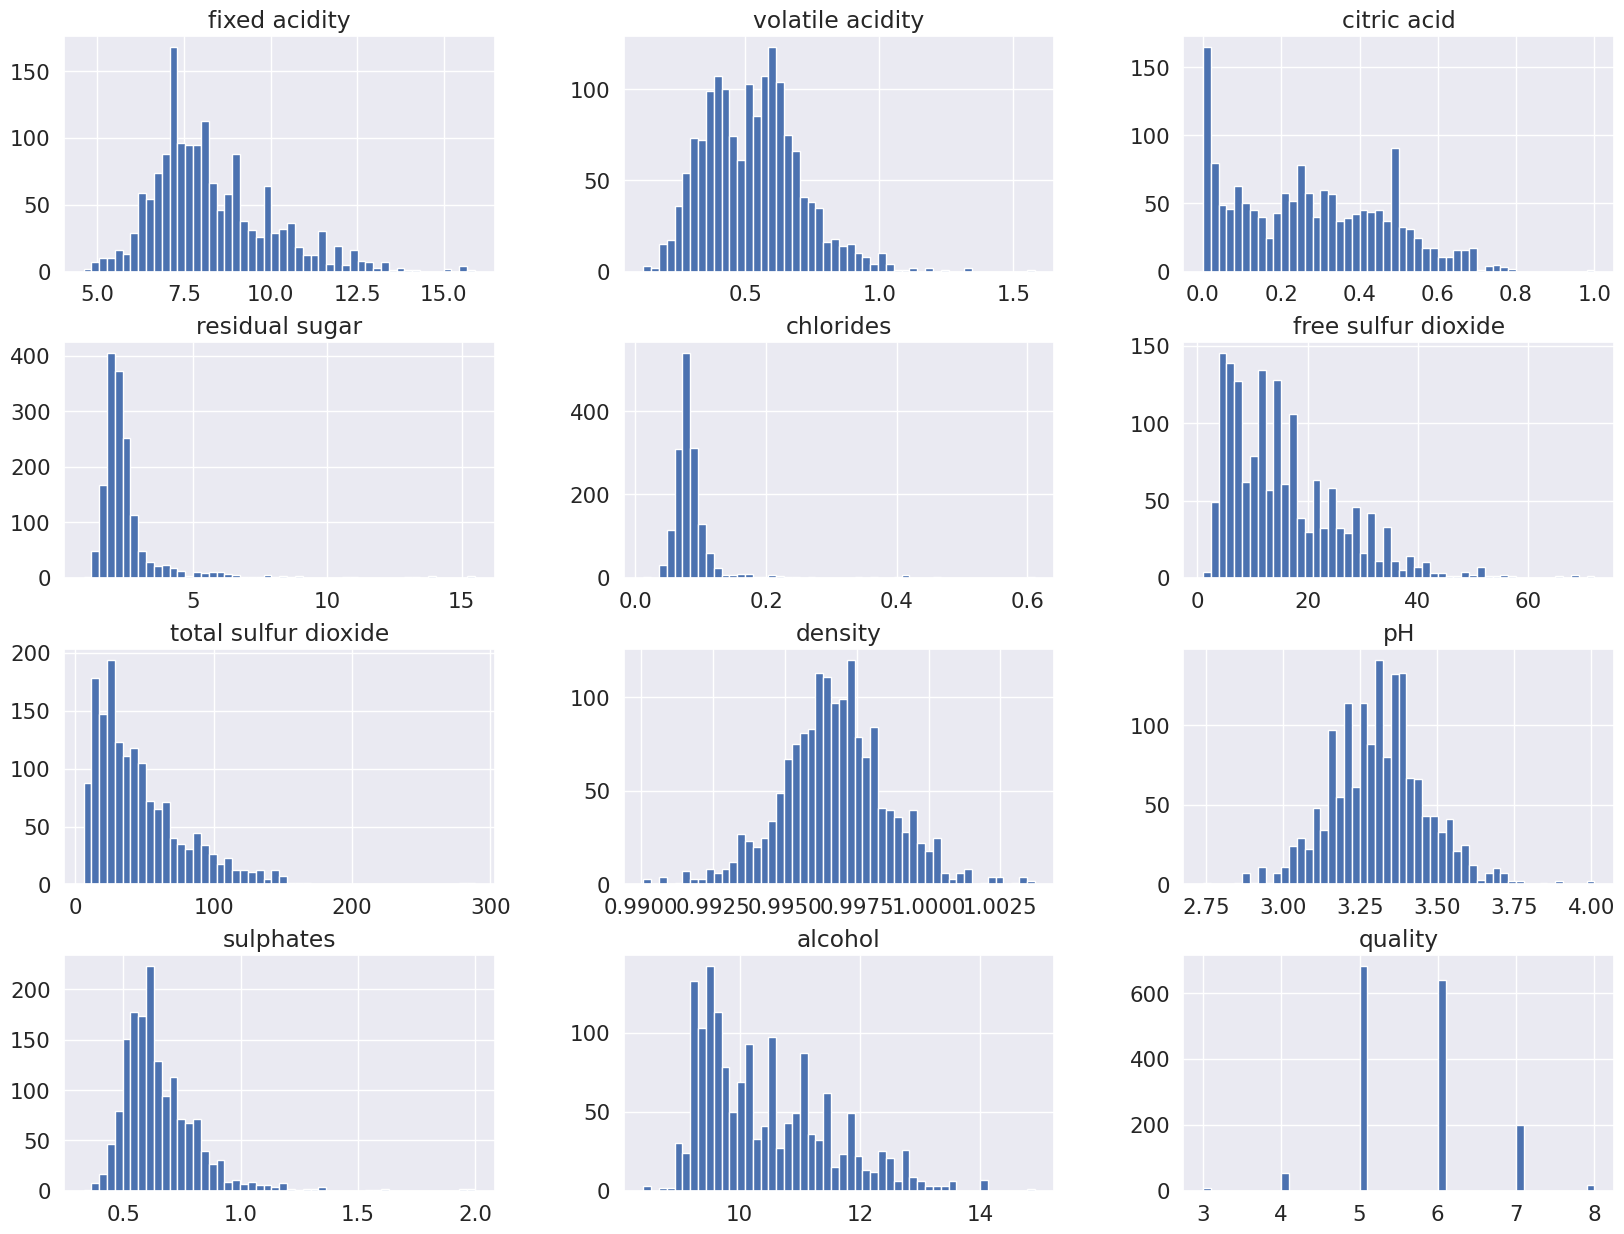

In [249]:
#Plot histogram to see how many values each column has in the dataset
data.hist(bins=50, figsize=(20,15))
plt.show()

In [250]:
data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

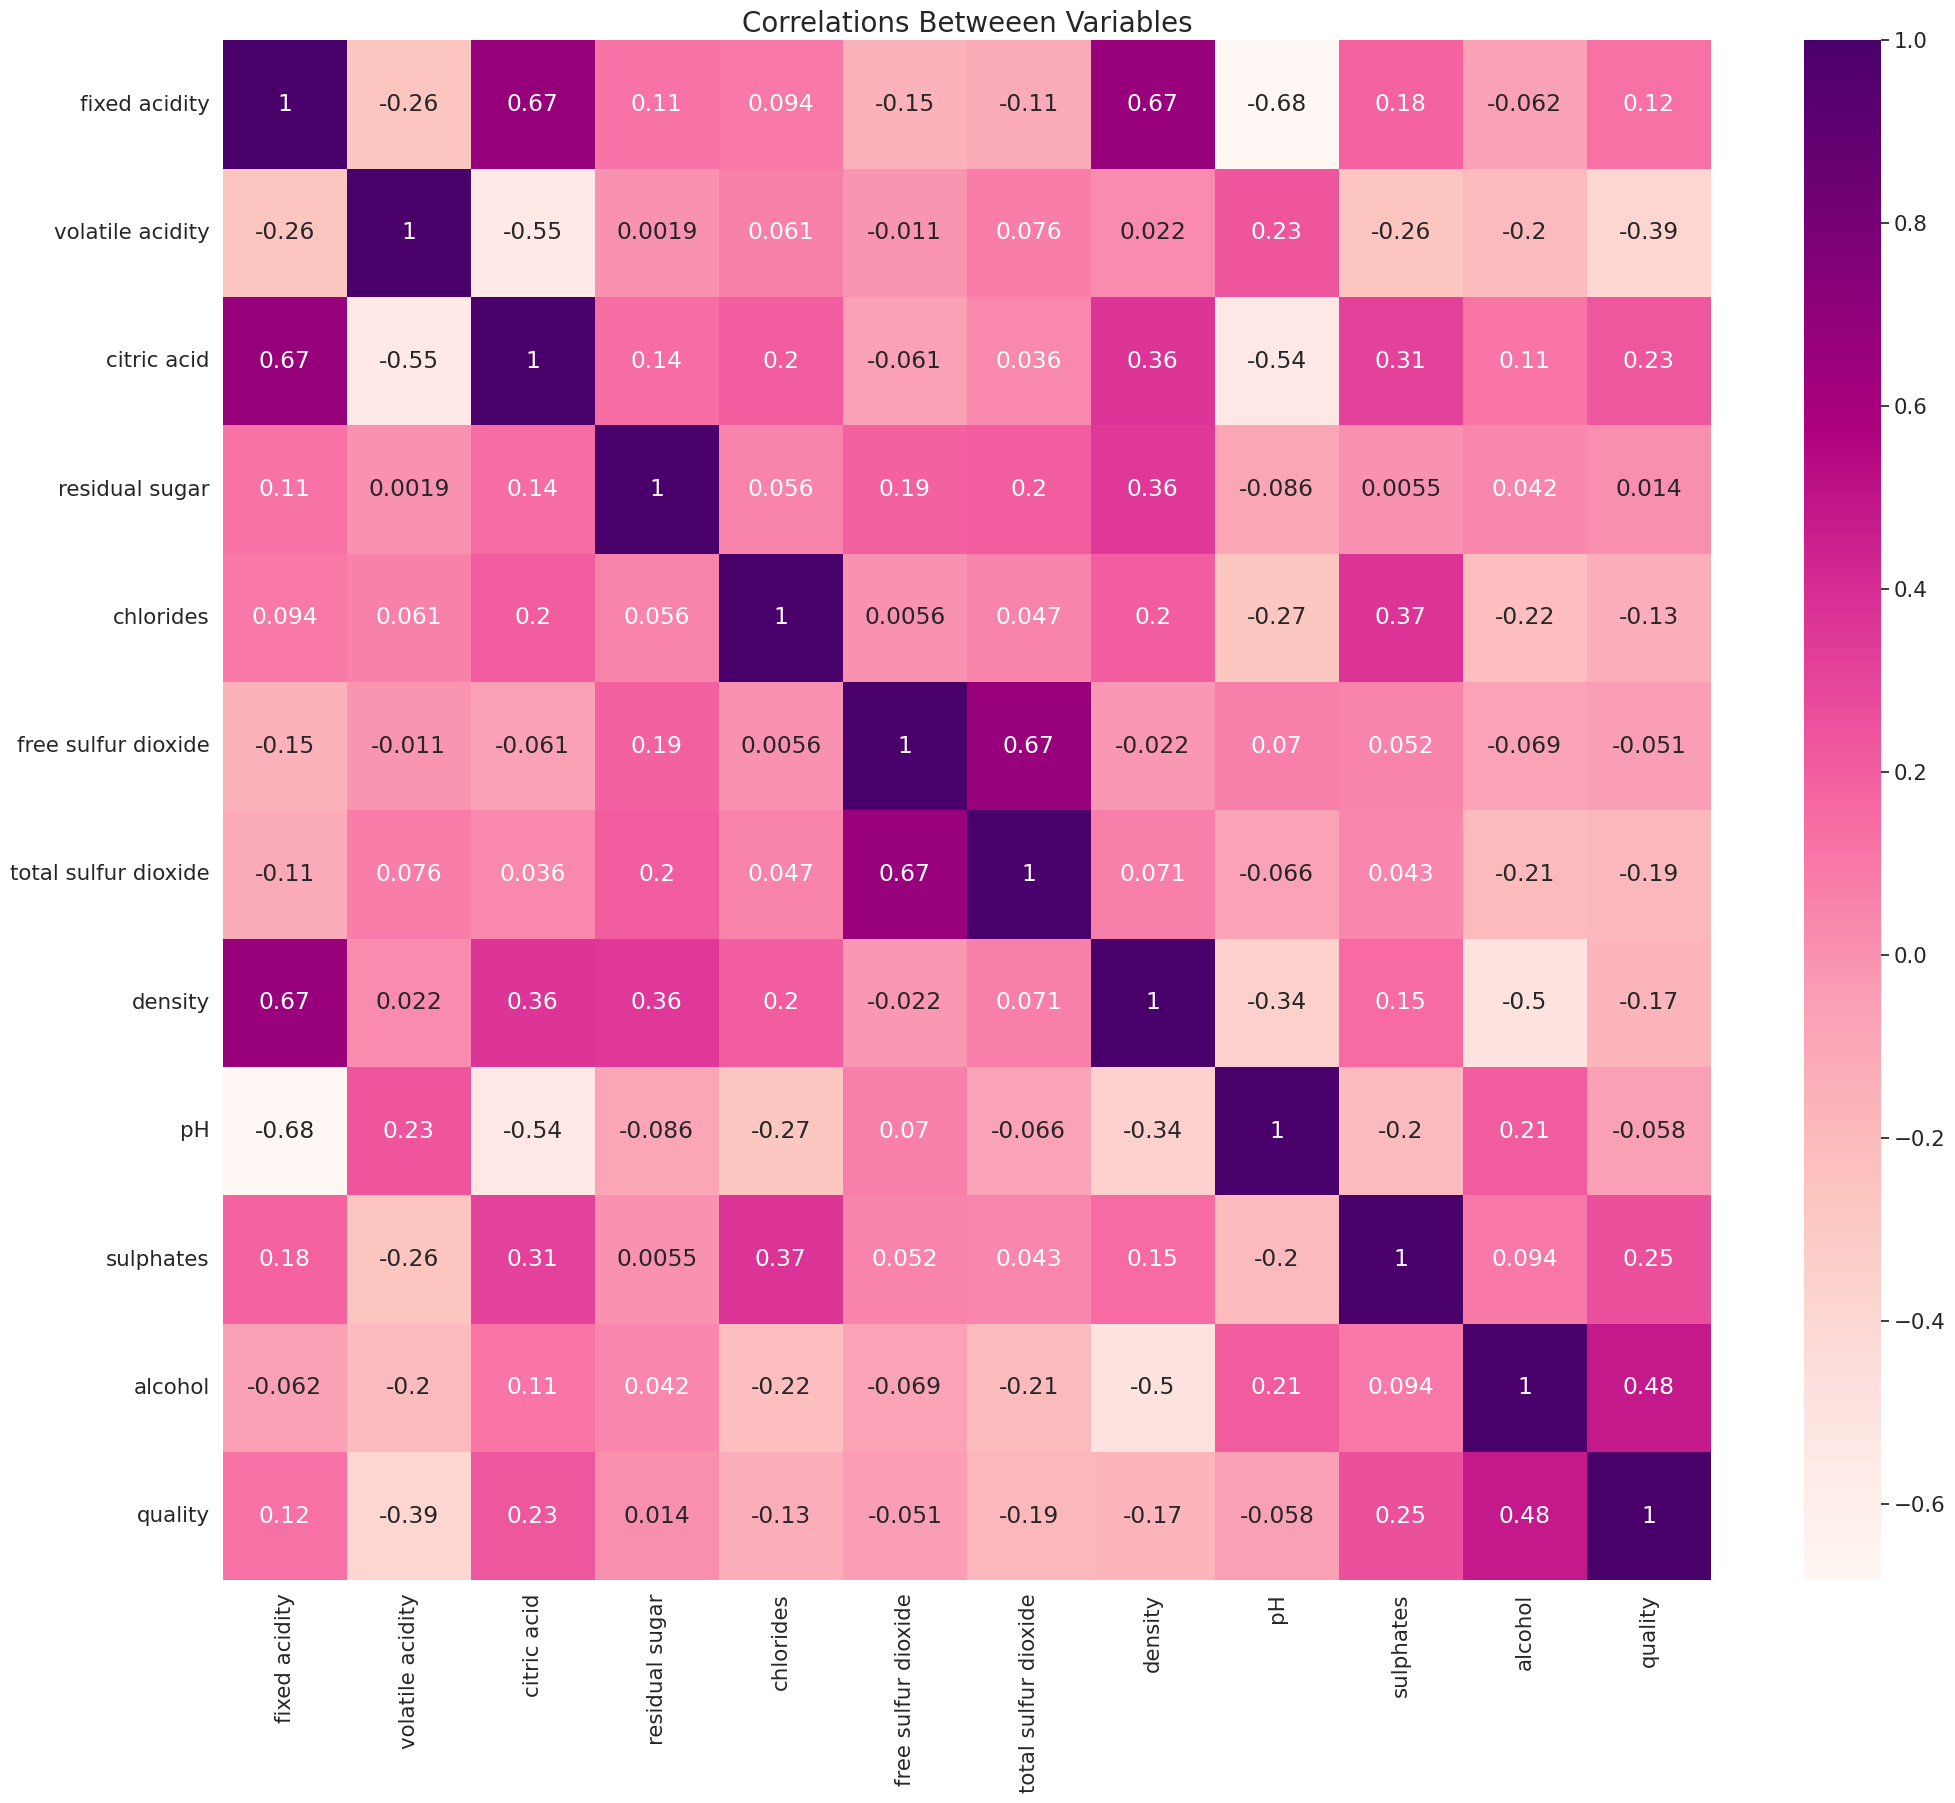

In [251]:
plt.figure(figsize=(24,20))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(), annot=True, cmap="RdPu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

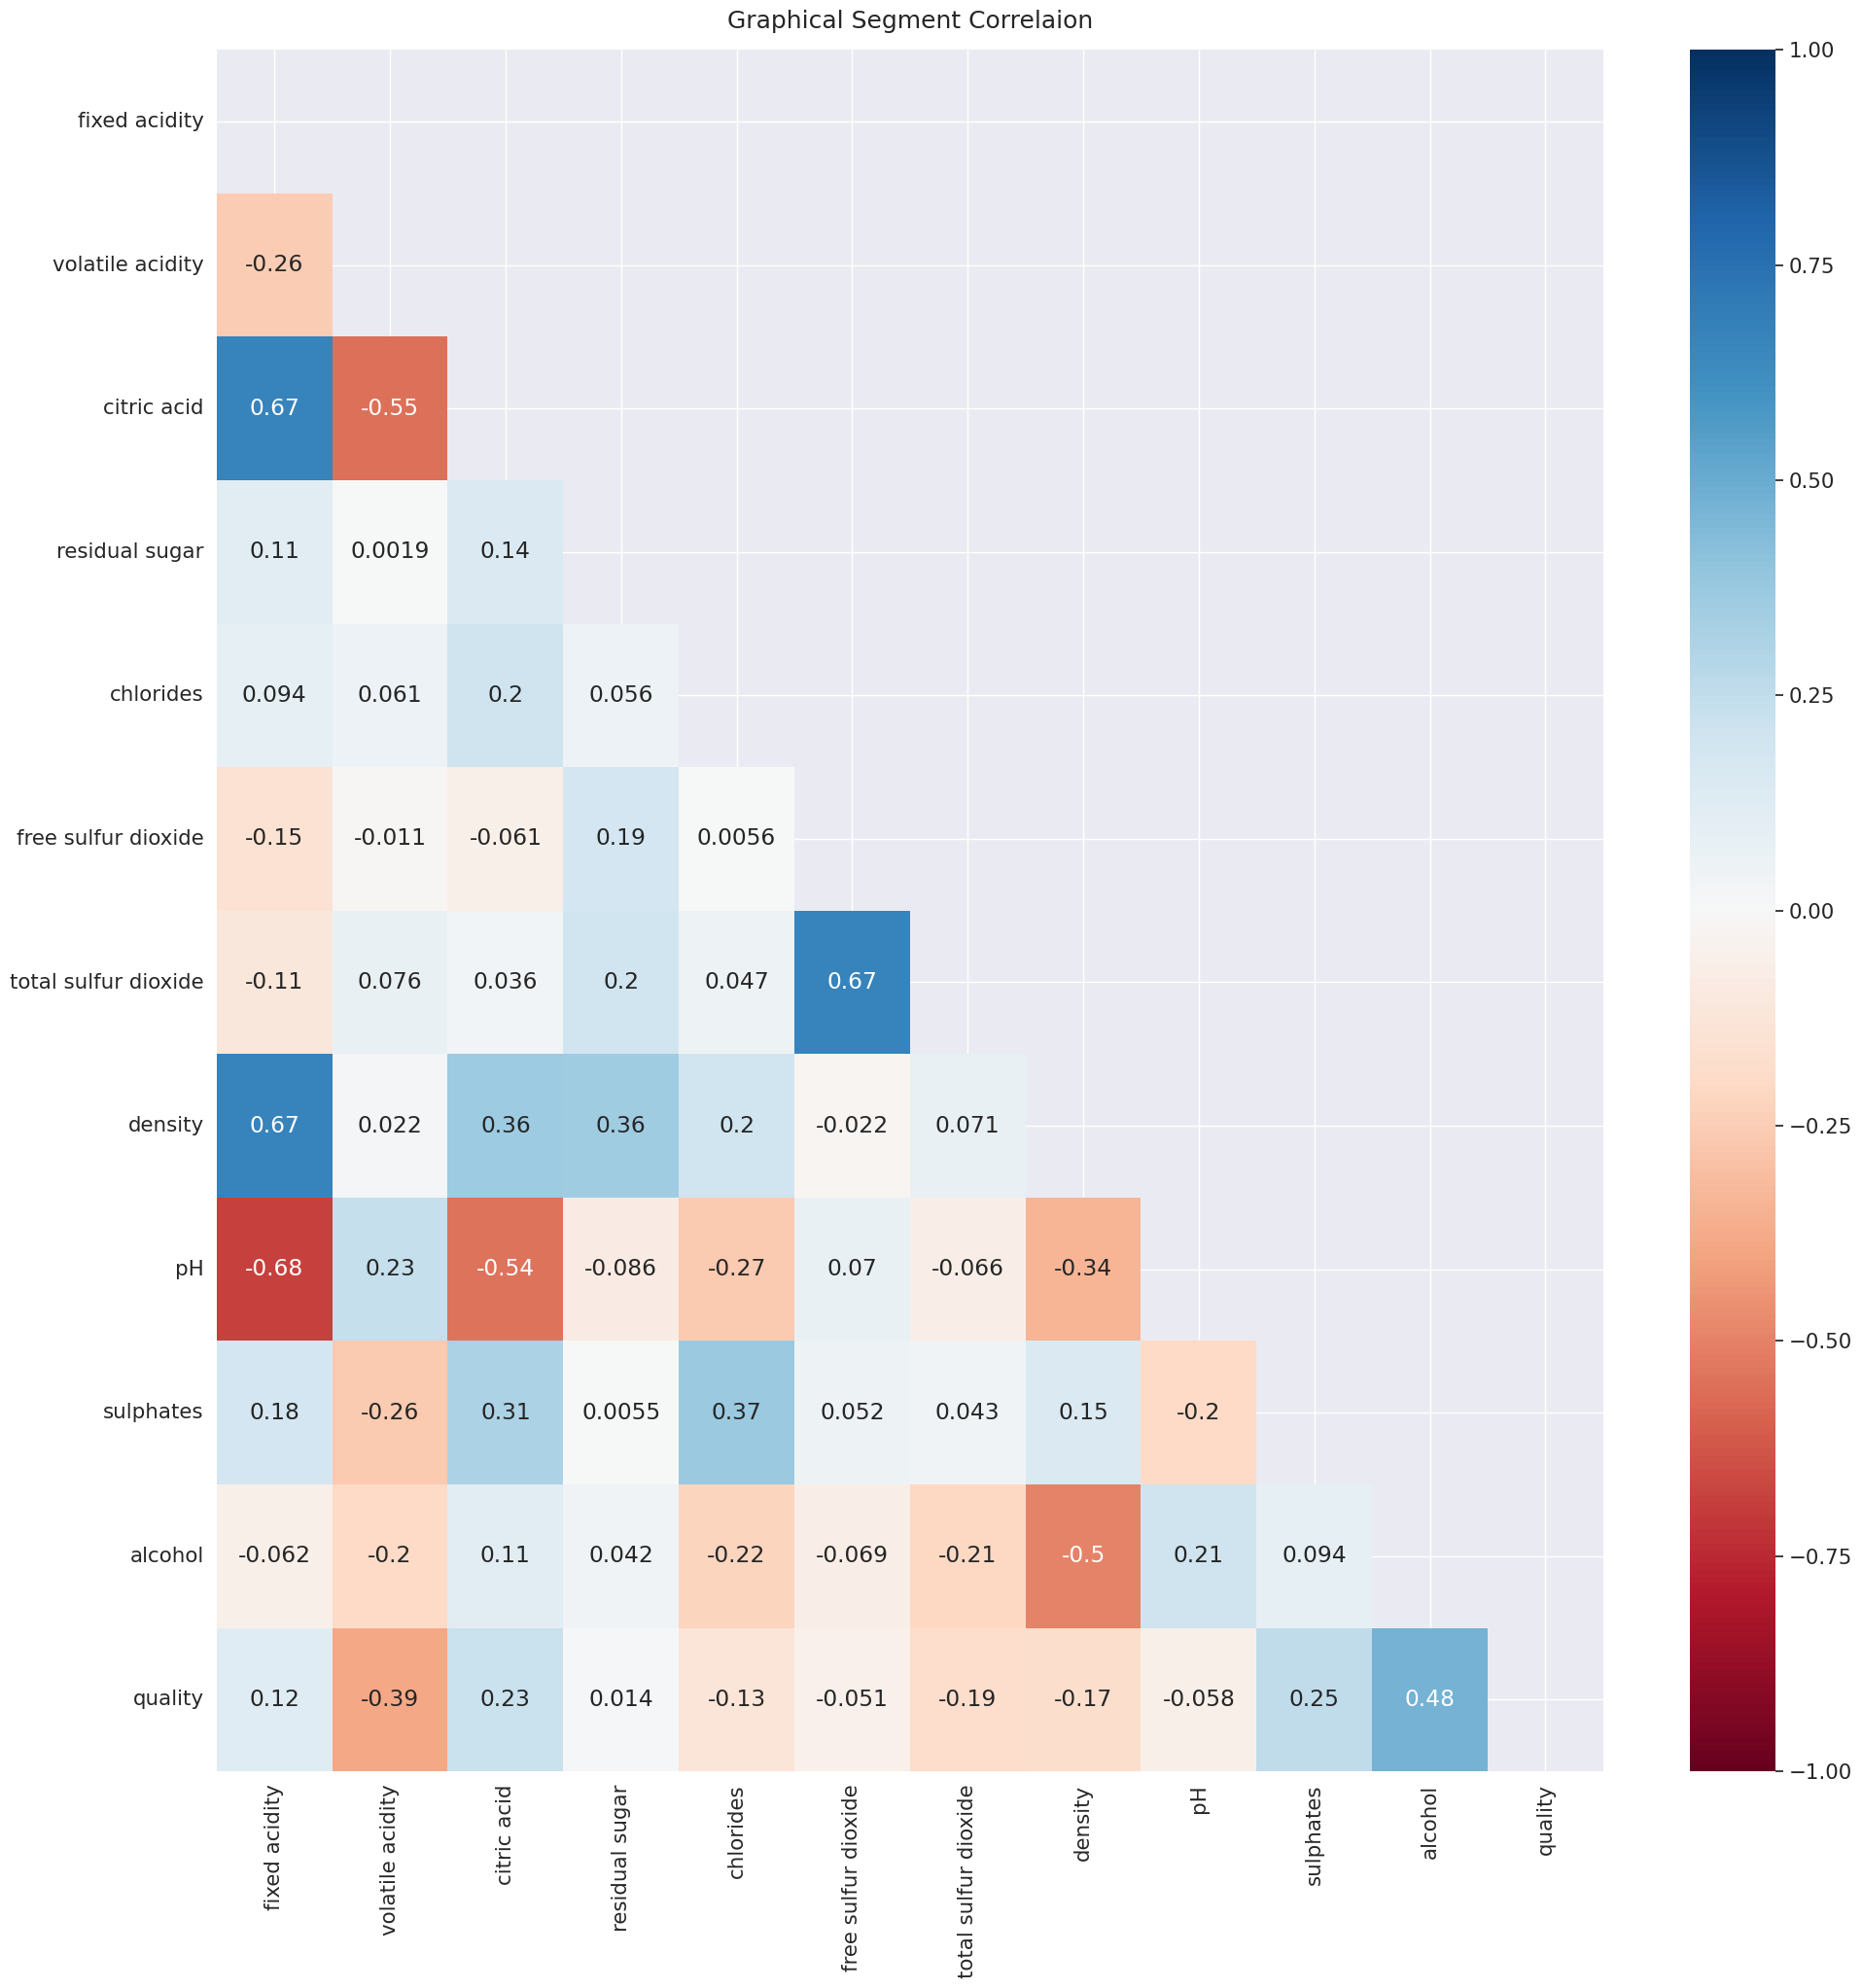

In [252]:
# Heatmap 2
corr = data.corr()
plt.figure(figsize=(23, 23))
sns.set(font_scale=1.4)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Graphical Segment Correlaion', fontdict={'fontsize':18}, pad=16);

When looking at the heatmap above,there is a positive correlation of **0.67**;
* between the values of "*fixed acidity*" and "*density*",
* between the values of "*fixed acidity*" and "*citric acid*",
* and between the values of "*free sulfur dioxide*" and "*total sulfur dioxide*".

There is also a negative correlation of **-0.68** between the values of "*fixed acidity*" and "*pH*".

Text(0.5, 1.0, 'fixed acidity vs pH')

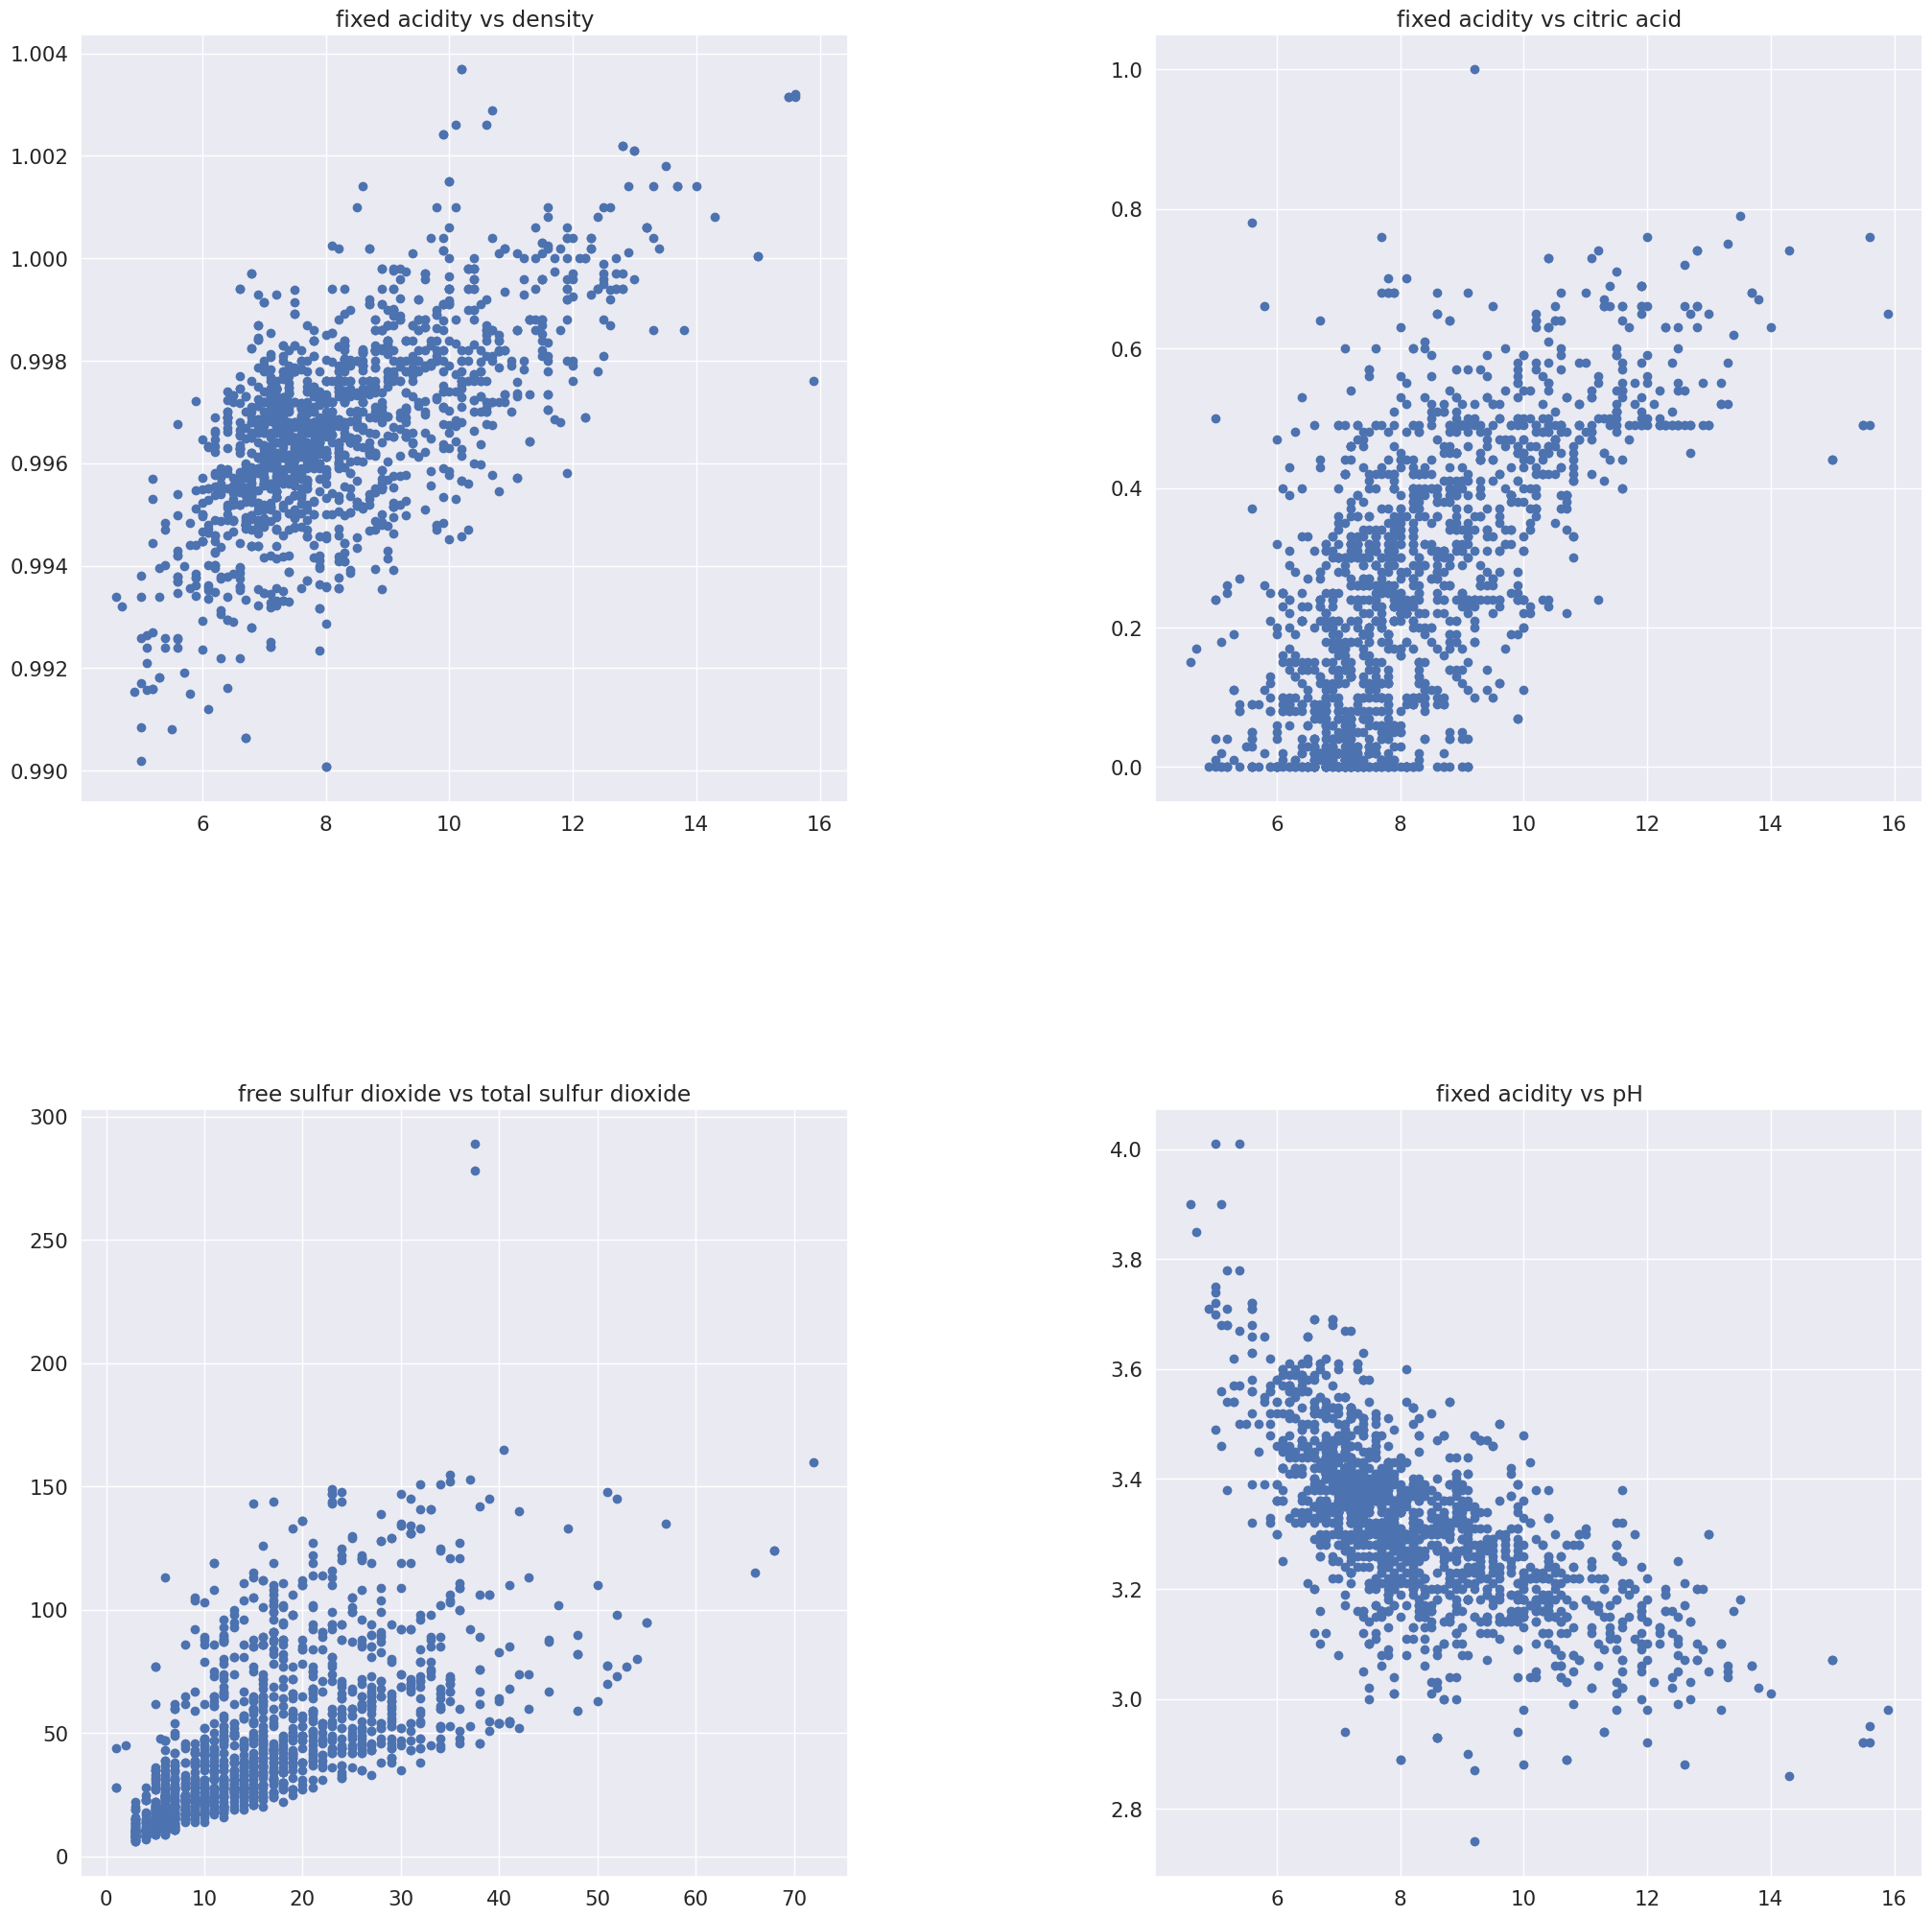

In [253]:
fig,axes = plt.subplots(2,2, figsize=(24,24))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0][0].scatter(data['fixed acidity'],data['density'])
axes[0][0].set_title("fixed acidity vs density")
axes[0][1].scatter(data['fixed acidity'],data['citric acid'])
axes[0][1].set_title("fixed acidity vs citric acid")
axes[1][0].scatter(data['free sulfur dioxide'],data['total sulfur dioxide'])
axes[1][0].set_title("free sulfur dioxide vs total sulfur dioxide")
axes[1][1].scatter(data['fixed acidity'],data['pH'])
axes[1][1].set_title("fixed acidity vs pH")

# SECTION 3: Split the Data into Train and Test Data

In [254]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [255]:
# Create the X variable for features
X = data.loc[:,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

# Create the y variable for output labels
y = data.loc[:, 'quality']

In [256]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# SECTION 4: BUILDING MODELS

In [257]:
# Create an object using the LogisticRegression() class
logistic_classifier_model = LogisticRegression()

# Create an object using the RidgeClassifier() class
ridge_classifier_model = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
decision_tree_model = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
naive_bayes_model = GaussianNB()

# Create an object using the MLPClassifier() class
neural_network_model = MLPClassifier()

# Create an object using the RandomForestClassifier() class
random_forest_model = RandomForestClassifier()

# Create an object using the SVC() class
svm_model = SVC()

# Create an object using the KNeighborsClassifier() class
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [258]:
def cross_val_report(title_string, model):
    global X
    global y
    print("*********** " + title_string + " ***********")
    accuracy = cross_val_score(estimator = model, X = X, y = y, cv = 5)
    print("Cross Validation Accuracy: {:.2f} %".format(accuracy.mean()*100))
    print("Cross Validation Standard Deviation: {:.2f} %".format(accuracy.std()*100))
    print("\n\n")

In [259]:
cross_val_report("Logistic Regression", logistic_classifier_model)
cross_val_report("Ridge Classifier", ridge_classifier_model)
cross_val_report("Decision Tree", decision_tree_model)
cross_val_report("Naive Bayes", naive_bayes_model)
cross_val_report("Neural Network", neural_network_model)
cross_val_report("Random Forest", random_forest_model)
cross_val_report("SVM", svm_model)
cross_val_report("KNN", knn_model)

*********** Logistic Regression ***********
Cross Validation Accuracy: 57.66 %
Cross Validation Standard Deviation: 2.77 %



*********** Ridge Classifier ***********
Cross Validation Accuracy: 56.54 %
Cross Validation Standard Deviation: 4.28 %



*********** Decision Tree ***********
Cross Validation Accuracy: 47.72 %
Cross Validation Standard Deviation: 1.94 %



*********** Naive Bayes ***********
Cross Validation Accuracy: 52.85 %
Cross Validation Standard Deviation: 4.72 %



*********** Neural Network ***********
Cross Validation Accuracy: 54.97 %
Cross Validation Standard Deviation: 3.42 %



*********** Random Forest ***********
Cross Validation Accuracy: 57.16 %
Cross Validation Standard Deviation: 3.15 %



*********** SVM ***********
Cross Validation Accuracy: 50.22 %
Cross Validation Standard Deviation: 4.24 %



*********** KNN ***********
Cross Validation Accuracy: 44.21 %
Cross Validation Standard Deviation: 2.90 %





**Checkpoint:** The performances of Logistic Regression, Ridge Classifier and Random Forest models are better than other models. But to see the results, let's continue with each model for now.

In [260]:
# Train the Logistic Classifier model
logistic_classifier_model.fit(X_train, y_train)

# Train the Ridge Classifier model
ridge_classifier_model.fit(X_train, y_train)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Train the Naive Bayes model
naive_bayes_model.fit(X_train, y_train)

# Train the Neural Network model
neural_network_model.fit(X_train, y_train)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Train the KNN model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [261]:
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred = logistic_classifier_model.predict(X_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred = ridge_classifier_model.predict(X_test)

# Make prediction using the test dataset on Decision Tree model
tree_pred = decision_tree_model.predict(X_test)

# Make prediction using the test dataset on Naive Bayes model
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Make prediction using the test dataset on Neural Network model
neural_network_pred = neural_network_model.predict(X_test)

# Make prediction using the test dataset on Random Forest model
random_forest_pred = random_forest_model.predict(X_test)

# Make prediction using the test dataset on SVM model
svm_pred = svm_model.predict(X_test)

# Make prediction using the test dataset on KNN model
knn_pred = knn_model.predict(X_test)

# SECTION 5: THE FIRST RESULTS AND COMPARISONS

In [262]:
# Create a Classification Report for Logistic Classifier model
logistic_report = classification_report(y_test, logistic_pred)

# Create a Classification Report for Ridge Classifier model
ridge_report = classification_report(y_test, ridge_pred)

# Create a Classification Report for Decision Tree model
tree_report = classification_report(y_test, tree_pred)

# Create a Classification Report for Naive Bayes model
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

# Create a Classification Report for Neural Network model
neural_network_report = classification_report(y_test, neural_network_pred)

# Create a Classification Report for Random Forest model
random_forest_report = classification_report(y_test, random_forest_pred)

# Create a Classification Report for SVM model
svm_report = classification_report(y_test, svm_pred)

# Create a Classification Report for KNN model
knn_report = classification_report(y_test, knn_pred)

In [263]:
# Print the report of the Logistic Regression model
print("***** Logitic Regression *****")
print(logistic_report)
print("\n\n")

# Print the report of the Ridge Regression model
print("***** Ridge Regression *****")
print(ridge_report)
print("\n\n")

# Print the report of the Decision Tree model
print("***** Decision Tree *****")
print(tree_report)
print("\n\n")

# Print the report of the Naive Bayes model
print("***** Naive Bayes *****")
print(naive_bayes_report)
print("\n\n")

# Print the report of the Neural Network model
print("***** Neural Network *****")
print(neural_network_report)
print("\n\n")

# Print the report of the Random Forest model
print("***** Random Forest *****")
print(random_forest_report)
print("\n\n")

# Print the report of the SVM model
print("***** SVM *****")
print(svm_report)
print("\n\n")

# Print the report of the KNN model
print("***** KNN *****")
print(knn_report)

***** Logitic Regression *****
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.70      0.76      0.73       212
           6       0.51      0.67      0.58       187
           7       0.00      0.00      0.00        68
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.20      0.24      0.22       480
weighted avg       0.51      0.60      0.55       480




***** Ridge Regression *****
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.69      0.82      0.75       212
           6       0.53      0.66      0.59       187
           7       0.00      0.00      0.00        68
           8       0.00      0.00      0.00         3

    accuracy  

| Model           | Accuracy | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score (Weighted Avg) |
|-----------------|----------|--------------------------|------------------------|-------------------------|
| Random Forest   | 0.72     | 0.71                     | 0.72                   | 0.71                    |
| Ridge Regression| 0.62     | 0.51                     | 0.62                   | 0.56                    |
| Decision Tree   | 0.62     | 0.63                     | 0.62                   | 0.63                    |

This table contains accuracy and weighted average precision, recall and f1-score metrics for each model. The table summarizes the performance of the "Random Forest", "Ridge Regression" and "Decision Tree" models. It seems that the best model is Random Forest. Now let's perform hyperparameter optimization on this model.

# SECTION 4: HYPERPARAMETERS OPTIMIZATION

In [269]:
# Define the hyperparameter ranges for optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the performance on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.671112267777066
Test set accuracy: 0.7104166666666667


In [277]:
#grid_search_report = classification_report(y_test, grid_search)
#print("***** Grid Search *****")
#print(grid_search_report)

In [284]:
cm_test_random_forest = confusion_matrix(y_test, random_forest_pred)
cm_test_random_forest

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,   4,   5,   0,   0],
       [  0,   0, 173,  39,   0,   0],
       [  0,   0,  37, 140,  10,   0],
       [  0,   0,   4,  33,  31,   0],
       [  0,   0,   0,   1,   1,   1]])

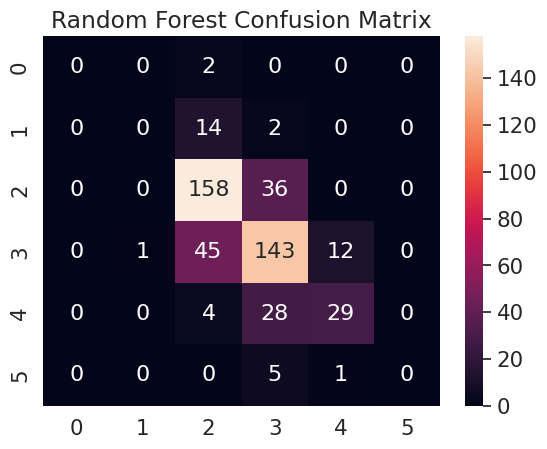

In [283]:
sns.set(font_scale=1.4)
sns.heatmap(cm_test_random_forest, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.show()